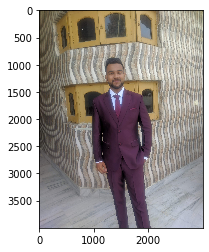

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/FLASH/Desktop/coursera/project_dataset"

CATEGORIES = ["Anam", "Angad","Achintya"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

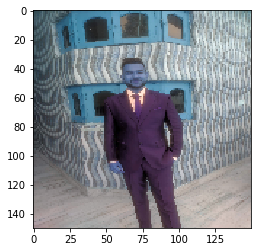

In [16]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [17]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        
        if(CATEGORIES.index(category) == 0):
            class_num = 'Anan'  # get the classification  (0 or a 1). 0=dog 1=cat
        elif(CATEGORIES.index(category) == 1):
            class_num = 'Angad'
        else:
            class_num = 'Achintya'
        
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 251/251 [00:09<00:00, 26.65it/s]

753


In [18]:
import random

random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

Angad
Achintya
Angad
Anan
Angad
Achintya
Achintya
Anan
Anan
Achintya


In [20]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[111 185 205]
   [112 190 209]
   [113 197 216]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[110 223 236]
   [107 226 238]
   [112 235 244]
   ...
   [253 255 255]
   [255 255 255]
   [255 255 255]]

  [[113 252 255]
   [113 252 255]
   [116 254 255]
   ...
   [252 255 255]
   [253 255 255]
   [255 255 255]]

  ...

  [[ 30  42  42]
   [ 34  46  46]
   [ 33  45  46]
   ...
   [ 18  23  24]
   [ 21  25  26]
   [ 17  21  22]]

  [[ 40  51  49]
   [ 43  54  52]
   [ 38  47  47]
   ...
   [ 15  20  21]
   [ 17  22  23]
   [ 18  23  24]]

  [[ 30  39  36]
   [ 25  33  33]
   [ 24  32  32]
   ...
   [ 15  20  21]
   [ 17  22  23]
   [ 16  21  22]]]]


In [21]:
import pickle

pickle_out = open("New_Dataset_X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("New_Dataset_y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [22]:

pickle_in = open("New_Dataset_X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("New_Dataset_y.pickle","rb")
y = pickle.load(pickle_in)

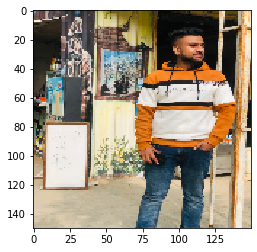

In [24]:
IMG_SIZE = 150

new_array = cv2.resize(X[10], (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
print(y)

['Angad', 'Achintya', 'Angad', 'Anan', 'Angad', 'Achintya', 'Achintya', 'Anan', 'Anan', 'Achintya', 'Anan', 'Anan', 'Angad', 'Angad', 'Achintya', 'Achintya', 'Achintya', 'Anan', 'Achintya', 'Achintya', 'Angad', 'Angad', 'Anan', 'Achintya', 'Anan', 'Achintya', 'Angad', 'Anan', 'Anan', 'Angad', 'Anan', 'Achintya', 'Angad', 'Achintya', 'Anan', 'Anan', 'Achintya', 'Angad', 'Anan', 'Achintya', 'Achintya', 'Anan', 'Achintya', 'Angad', 'Angad', 'Anan', 'Anan', 'Anan', 'Anan', 'Anan', 'Anan', 'Anan', 'Achintya', 'Achintya', 'Achintya', 'Achintya', 'Achintya', 'Angad', 'Angad', 'Angad', 'Achintya', 'Angad', 'Angad', 'Anan', 'Achintya', 'Achintya', 'Achintya', 'Anan', 'Anan', 'Achintya', 'Anan', 'Anan', 'Anan', 'Angad', 'Angad', 'Anan', 'Anan', 'Achintya', 'Angad', 'Angad', 'Angad', 'Achintya', 'Angad', 'Anan', 'Anan', 'Anan', 'Anan', 'Angad', 'Anan', 'Achintya', 'Angad', 'Achintya', 'Achintya', 'Anan', 'Achintya', 'Anan', 'Angad', 'Achintya', 'Achintya', 'Anan', 'Achintya', 'Angad', 'Angad', 'A